In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

## Means-Shift

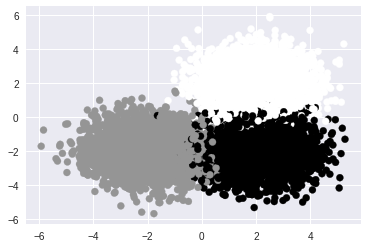

In [19]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [20]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


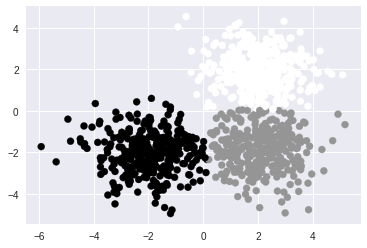

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [21]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

## Spectral Clustering

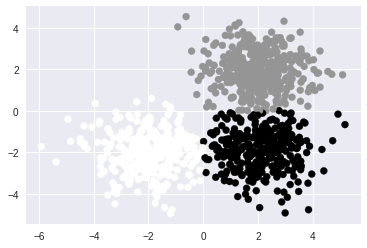

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  357    5
1      310    1    9
2        5    7  306


In [22]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

## Affinity Propagation

In [23]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 93


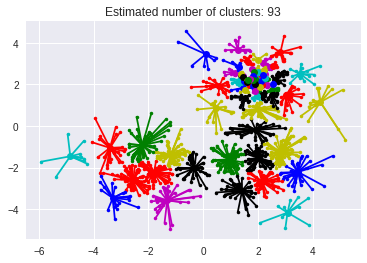

In [24]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Drill: Mo' blobs, mo' problems? 

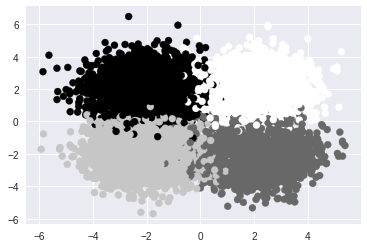

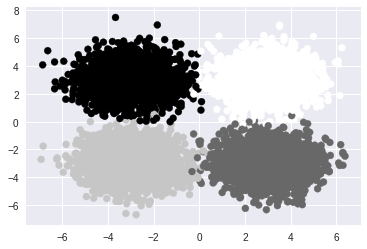

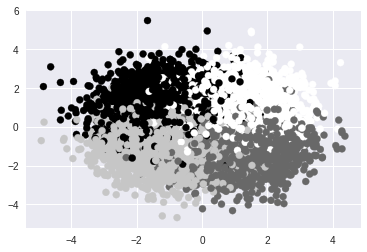

In [25]:
#create our blobs 
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2]],[[3,3],[-3,-3],[3,-3],[-3,3]],[[1,1],[-1,-1],[1,-1],[-1,1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
for center in centers: 
  X, y = make_blobs(
     n_samples=10000,
     centers=center,
     cluster_std=1,
     n_features=2,
     random_state=42)

  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.show()


## K Means Loop


Centers: [[2, 2], [-2, -2], [2, -2], [-2, 2]]
Number of estimated clusters: 4


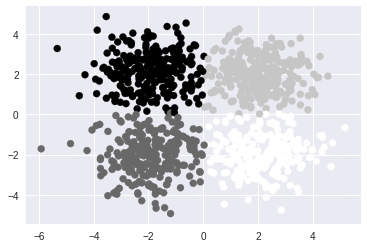

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        5  260    0    8
1        6    0  228    5
2      226    3    9    0
3        0    2    7  241

Centers: [[3, 3], [-3, -3], [3, -3], [-3, 3]]
Number of estimated clusters: 4


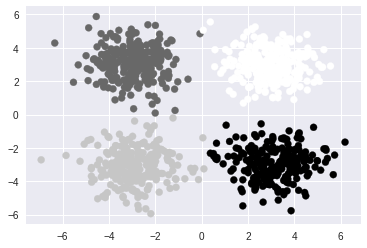

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0  238    0    1
2        0    2    0  236
3        0    0  250    0

Centers: [[1, 1], [-1, -1], [1, -1], [-1, 1]]
Number of estimated clusters: 4


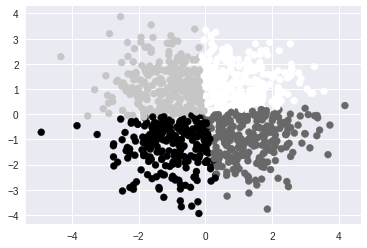

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      191   32   43    7
1        5   35   31  168
2       20    7  176   35
3       39  179    6   26


In [31]:
for center in centers:
    X, y = make_blobs(
        n_samples=10000,
        centers=center,
        cluster_std=1,
        n_features=2,
        random_state=42)

  #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)
    
    n_clusters = len(center)
    y_pred = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_train)


    
    print("\nCenters:", center)
    print("Number of estimated clusters: {}".format(n_clusters))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,y_pred))

## Means - Shift Loop

Number of estimated clusters: 4


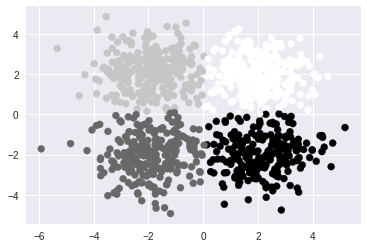

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0
Number of estimated clusters: 4


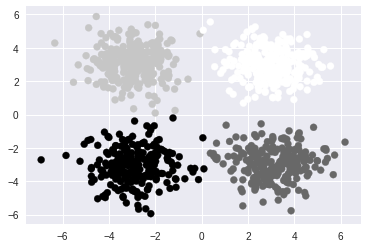

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0    0    1  238
2        0    0  236    2
3        0  250    0    0
Number of estimated clusters: 2


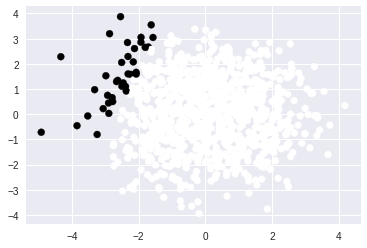

Comparing the assigned categories to the ones in the data:
col_0    0   1
row_0         
0      271   2
1      233   6
2      238   0
3      222  28


In [26]:
 for center in centers: 
  X, y = make_blobs(
     n_samples=10000,
     centers=center,
     cluster_std=1,
     n_features=2,
     random_state=42)

  #Divide into training and test sets.
  X_train, X_test, y_train, y_test = train_test_split(
     X,
     y,
     test_size=0.9,
     random_state=42)
  # Here we set the bandwidth. This function automatically derives a bandwidth
  # number based on an inspection of the distances among points in the data.
  bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

  # Declare and fit the model.
  ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
  ms.fit(X_train)

  # Extract cluster assignments for each data point.
  labels = ms.labels_

  # Coordinates of the cluster centers.
  cluster_centers = ms.cluster_centers_

  # Count our clusters.
  n_clusters_ = len(np.unique(labels))

  print("Number of estimated clusters: {}".format(n_clusters_))
  
  plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
  plt.show()

  print('Comparing the assigned categories to the ones in the data:')
  print(pd.crosstab(y_train,labels))

## Spectral Clustering Loop

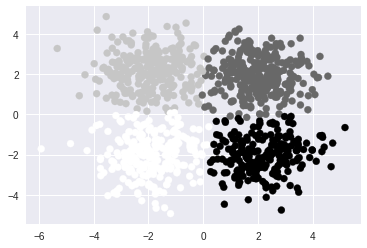

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    8  263    2
1      228    5    0    6
2       11    0    5  222
3        8  239    3    0


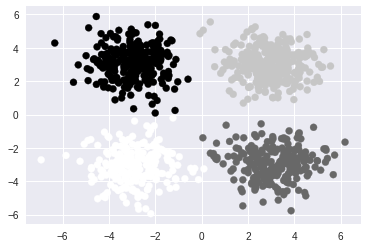

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0  273    0    0
1      238    0    1    0
2        1    0  237    0
3        0    1    0  249


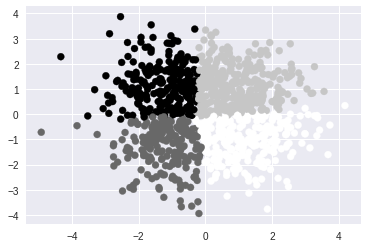

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0       37  208    3   25
1       45   10  154   30
2      187   25   19    7
3        9   51   20  170


In [27]:
 for center in centers: 
  X, y = make_blobs(
     n_samples=10000,
     centers=center,
     cluster_std=1,
     n_features=2,
     random_state=42)

  #Divide into training and test sets.
  X_train, X_test, y_train, y_test = train_test_split(
     X,
     y,
     test_size=0.9,
     random_state=42)
  # We know we're looking for three clusters.
  n_clusters=4

  # Declare and fit the model.
  sc = SpectralClustering(n_clusters=n_clusters)
  sc.fit(X_train)

  #Predicted clusters.
  predict=sc.fit_predict(X_train)

  #Graph results.
  plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
  plt.show()

  print('Comparing the assigned categories to the ones in the data:')
  print(pd.crosstab(y_train,predict))

## Affinity Propaganda Loop

Done
Estimated number of clusters: 25


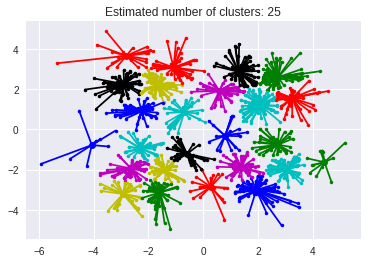

Done
Estimated number of clusters: 126


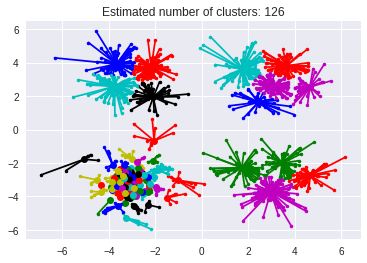

Done
Estimated number of clusters: 35


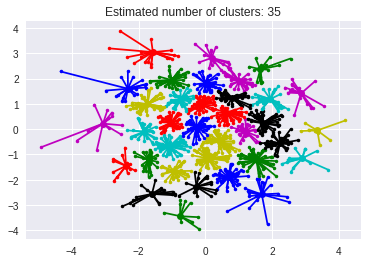

In [28]:
 for center in centers: 
  X, y = make_blobs(
     n_samples=10000,
     centers=center,
     cluster_std=1,
     n_features=2,
     random_state=42)
  
  #Divide into training and test sets.
  X_train, X_test, y_train, y_test = train_test_split(
     X,
     y,
     test_size=0.9,
     random_state=42)
  #declare the model and fit it in one statement.
  #Note that you can provide arguments to the model, but we didn't.
  af = AffinityPropagation().fit(X_train)
  print('Done')

  # Pull the number of clusters and cluster assignments for each data point.
  cluster_centers_indices = af.cluster_centers_indices_
  n_clusters_ = len(cluster_centers_indices)
  labels = af.labels_

  print('Estimated number of clusters: {}'.format(n_clusters_))
  plt.figure(1)
  plt.clf()

  # Cycle through each cluster and graph them with a center point for the
  # exemplar and lines from the exemplar to each data point in the cluster.
  colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  for k, col in zip(range(n_clusters_), colors):
      class_members = labels == k
      cluster_center = X_train[cluster_centers_indices[k]]
      plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
      plt.plot(cluster_center[0],
              cluster_center[1],
               'o',
               markerfacecolor=col,
               markeredgecolor='k')
      for x in X_train[class_members]:
          plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

  plt.title('Estimated number of clusters: {}'.format(n_clusters_))
  plt.show()